# Breakdown of the 4th Down

In [126]:
%matplotlib inline

import pandas as pd
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import math
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from astropy.table import Table
from scipy import stats
from statsmodels.formula.api import ols
warnings.simplefilter(action = "ignore")

all_plays = pd.read_csv('../data/nflplaybyplay2015.csv')
play_codes = {'Punt': 'Punt', 'Field Goal': 'Field Goal', 'Pass': 'Play Attempt (Pass/Run/Sack)', 'No Play': 'Other', 'Run': 'Play Attempt (Pass/Run/Sack)', 'Sack': 'Play Attempt (Pass/Run/Sack)', 'QB Kneel': 'Other', 'Timeout': 'Other'}
all_plays['Play'] = all_plays['PlayType'].map(play_codes)

short_flag = all_plays['ydstogo'] < 5
med_flag = (all_plays['ydstogo'] >= 5) & (all_plays['ydstogo'] <= 10)
long_flag = all_plays['ydstogo'] > 10

all_plays.loc[short_flag, 'dist_cat'] = 'Short'
all_plays.loc[med_flag, 'dist_cat'] = 'Medium'
all_plays.loc[long_flag, 'dist_cat'] = 'Long'


Create a dataframe of just the 4th Down Plays

In [127]:
other_plays = all_plays[all_plays['down'] != 4]
fourth_plays = all_plays[all_plays['down'] == 4]
fourth_plays = fourth_plays.drop(['Unnamed: 0', 'PlayAttempted', 'Season'], 1)
converted_flag = fourth_plays['ydstogo'] > fourth_plays['Yards.Gained']
fourth_plays['converted'] = 1
fourth_plays.loc[converted_flag, 'converted'] = 0



Create some other dataframes that divide up the fourth down plays by attempts, punts, field goals and other.  Do the same for first quarter, second quarter, third quarter and fourth.

In [128]:
attempts = fourth_plays[fourth_plays['Play'] == 'Play Attempt (Pass/Run/Sack)']
punts = fourth_plays[fourth_plays['Play'] == 'Punt']
field_goals = fourth_plays[fourth_plays['Play'] == 'Field Goal']
other_plays = fourth_plays[fourth_plays['Play'] == 'Other']

first_qtr = fourth_plays[fourth_plays['qtr'] == 1]
second_qtr = fourth_plays[fourth_plays['qtr'] == 2]
third_qtr = fourth_plays[fourth_plays['qtr'] == 3]
fourth_qtr = fourth_plays[fourth_plays['qtr'] == 4]

## Distribution of Play Type

In [129]:
att = attempts['yrdline100']
punt = punts['yrdline100']
fg = field_goals['yrdline100']
other = other_plays['yrdline100']
rows = ['4th Down Attempt', 'Punt', 'FG', 'Other']
    
distance_avg = [round(np.mean(att), 2), round(np.mean(punt), 2), round(np.mean(fg), 2), round(np.mean(other), 2)]
distance_mode = [stats.mode(att).mode, stats.mode(punt).mode, stats.mode(fg).mode, stats.mode(other).mode]
distance_sd = [round(np.std(att), 2), round(np.std(punt), 2), round(np.std(fg), 2), round(np.std(other), 2)]    
tbl = Table([rows, distance_avg, distance_mode, distance_sd], names=('Type', 'Average Dist to Goal', 'Mode', 'SD'))
print(tbl)

      Type       Average Dist to Goal Mode [1]   SD 
---------------- -------------------- -------- -----
4th Down Attempt                38.43     38.0 22.32
            Punt                66.41     75.0 14.88
              FG                19.93     30.0 10.21
           Other                49.05     73.0 24.79


We see that 4th down attempts occur around the 38 yard line, a mark that is inbetwen the average punt and fg line.  This is not particularly a surpirse.  However, we note that 4th down attempts have a much larger spread than punts and FG.  This is most likely due to the variety of when 4th downs need to be completed (ie at the end of games a team that is down may be forced to attempt a 4th and long). 

### Distribution of Play Type by Distance to Goal

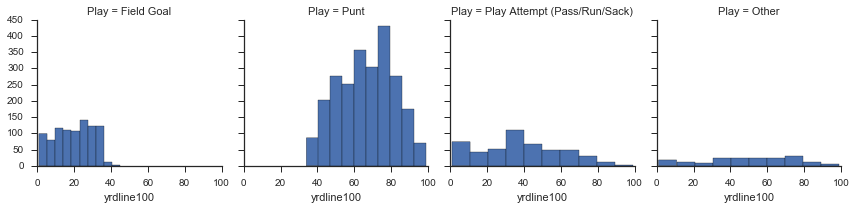

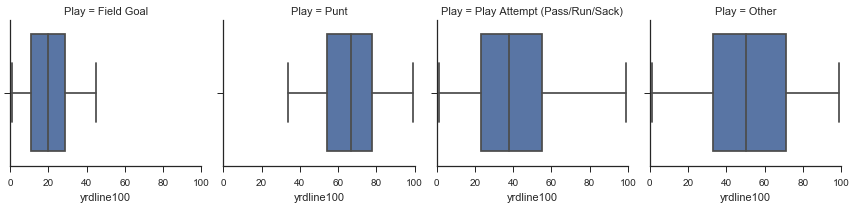

In [130]:
g1 = sns.FacetGrid(fourth_plays, col='Play')
g1.map(plt.hist, 'yrdline100')
g2 = sns.FacetGrid(fourth_plays, col='Play')
g2.map(sns.boxplot, 'yrdline100')
sns.plt.show()

### Distribution of Play Type by Time Left

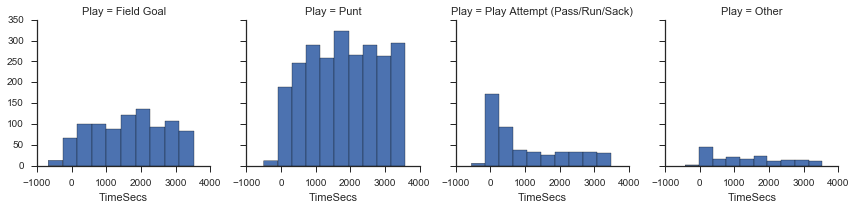

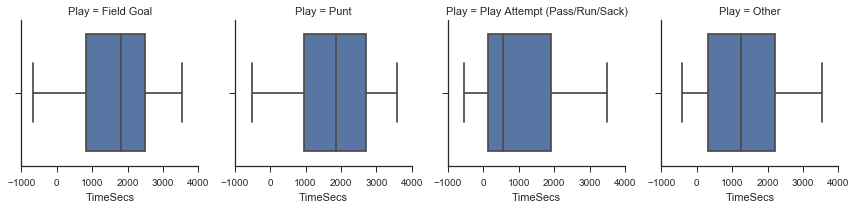

In [131]:
g1 = sns.FacetGrid(fourth_plays, col='Play')
g1.map(plt.hist, 'TimeSecs')

g1 = sns.FacetGrid(fourth_plays, col='Play')
g1.map(sns.boxplot, 'TimeSecs')
sns.plt.show()

### Distribution of Play Type by Distance to First Down

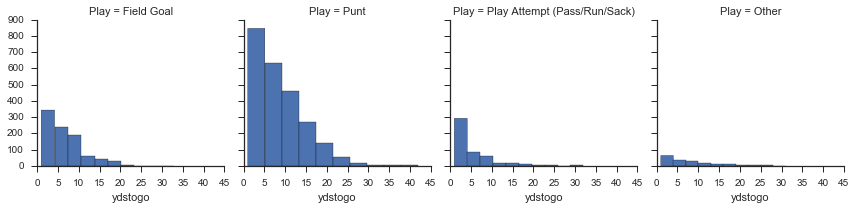

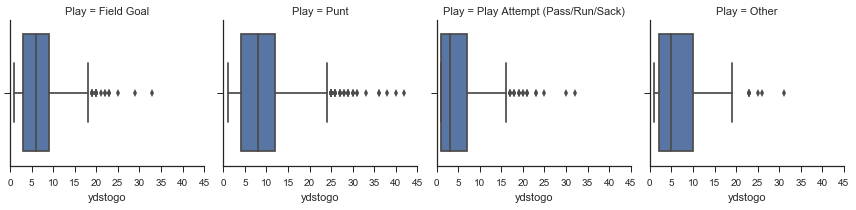

In [132]:
g1 = sns.FacetGrid(fourth_plays, col='Play')
g1.map(plt.hist, 'ydstogo')

g1 = sns.FacetGrid(fourth_plays, col='Play')
g1.map(sns.boxplot, 'ydstogo')
sns.plt.show()

### Wins vs. 4th Down Attempts Percentage

In [133]:
standings15 = pd.read_csv('../data/standings2015.csv')
fourth_plays_vc = dict(fourth_plays['posteam'].value_counts())
attempts_vc = dict(attempts['posteam'].value_counts())
standings15['4thPossesions'] = standings15['Team'].map(fourth_plays_vc)
standings15['4thAttempts'] = standings15['Team'].map(attempts_vc)
standings15['PercentAttempts'] = standings15['4thAttempts']/standings15['4thPossesions']


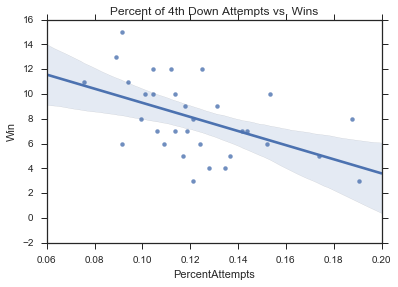

In [134]:
sns.regplot(standings15['PercentAttempts'], standings15['Win'])
plt.title('Percent of 4th Down Attempts vs. Wins')

In [135]:
display(standings15)

,Team,Win,Loss,Unnamed: 3,4thPossesions,4thAttempts,PercentAttempts
0,NE,12,4,NaN,128,16,0.125000
1,NYJ,10,6,NaN,132,15,0.113636
2,BUF,8,8,NaN,132,16,0.121212
3,MIA,6,10,NaN,138,21,0.152174
4,DEN,12,4,NaN,134,14,0.104478
5,KC,11,5,NaN,119,9,0.075630
6,OAK,7,9,NaN,132,15,0.113636
7,SD,4,12,NaN,125,16,0.128000
8,CIN,12,4,NaN,116,13,0.112069
9,PIT,10,6,NaN,115,12,0.104348


In [136]:
model = ols('Win~PercentAttempts', standings15).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     10.50
Date:                Tue, 16 Aug 2016   Prob (F-statistic):            0.00291
Time:                        13:52:52   Log-Likelihood:                -75.758
No. Observations:                  32   AIC:                             155.5
Df Residuals:                      30   BIC:                             158.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          14.9753      2.203      6.797      0.000        10.476    19.475
PercentAttempts   -56.8945     17.555     -3.241      0.003       -92.746   -21.043
==============================================================================
Omnibus:                        1.006   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                0.854
Skew:                           0.108   Prob(JB):                        0.652
Kurtosis:                       2.230   Cond. No.                         37.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

While it is generally agreed upon that 4th down possessions are under utilized by teams, this data seems to contradict that fact.  There is a negative correlation between how often a team attempts to convert a 4th down and the number of wins a team has.  We see that that the true coef for PercentAttempts falls in quite a large range (-93, -21) and that with an R^2 value of 0.024, about 1/4 of all wins can be attributed to PercentAttempts.  This means in a 256 game season among all teams, approximately 64 wins were affected by attempts on 4th Down.   

However, I do not believe that this can reliably attest to the discussion of whether or not to go for it on 4th Down.  We see that that no team even attempts 1/4 of their 4th downs.  For now, I posit that there is insufficient data resulting from a reluctance of coaches to make an attempt.  This is also a limited set as it is only data for the 2015 season.  

### Point Spread during 4th Down

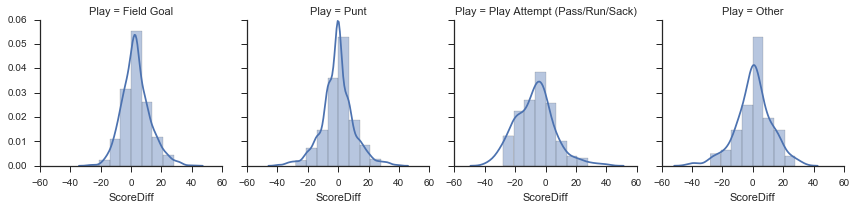

In [142]:
g1 = sns.FacetGrid(fourth_plays, col='Play')
bins_fg = [-27, -24, -21, -18, -15, -12, -9, -6, -3, 0, 3, 6, 9, 12, 15, 18, 21, 24, 27]
bins_td = [-28, -21, -14, -7, 0, 7, 14, 21, 28]
g1.map(sns.distplot, 'ScoreDiff', bins=bins_td)


Focusing on punts and attempts only.  We see that the graph for attempts is skewed slightly to the left, implying that teams that are down will attempt 4th downs more often.  It is interesting to note, however, that there is a sudden dropoff in attempts once a team is ahead during a game.  In contrast, the number of punts increases drastically as soon as the score difference is greater than 0.

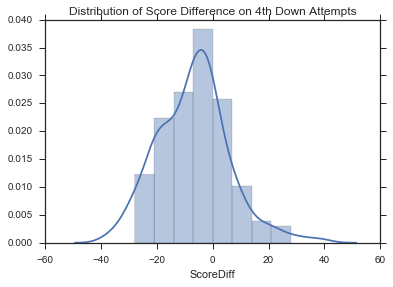

In [138]:
g1 = sns.distplot(attempts['ScoreDiff'], bins=bins_td)
plt.title('Distribution of Score Difference on 4th Down Attempts')


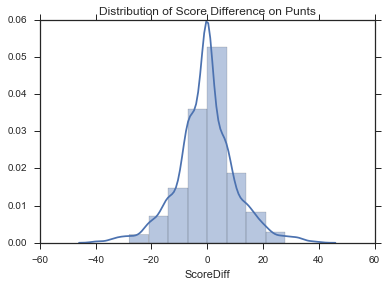

In [139]:
g1 = sns.distplot(punts['ScoreDiff'], bins=bins_td)
plt.title('Distribution of Score Difference on Punts')
plt.draw()


### Pass vs. Run
This section looks at all attempted 4th downs to determine if running or passing was more popular as well as how effective the play was. 

In [158]:
run_plays_4D = len(fourth_plays['PlayType'] == 'Run')
all_runs = len(all_plays['PlayType'] == 'Run')
pass_plays_4D = len(fourth_plays['PlayType'] == 'Pass') + len(attempts['PlayType'] == 'Sack')
all_pass = len(all_plays['PlayType'] == 'Pass') + len(all_plays['PlayType'] == 'Sack')

play_usage = ['Run', 'Pass']

print('Total Plays:', len(all_plays))
print('Total 4D Plays:', len(fourth_plays), '\n')
runs_and_passes = {
                    '4th Down': pd.Series([run_plays_4D, pass_plays_4D], index=play_usage), 
                    '4th Down Ratio': pd.Series([run_plays_4D/len(all_plays), pass_plays_4D/len(all_plays)], index=play_usage),
                    'All Downs': pd.Series([all_runs, all_pass], index=play_usage), 
                    'Percentage of All Plays': pd.Series([all_runs/len(all_plays), all_pass/len(all_plays)], index=play_usage)}
display(pd.DataFrame(runs_and_passes))

Total Plays: 46129
Total 4D Plays: 4009 



,4th Down,All Downs,Percent of All Plays,Percentage of All Plays
Run,4009,46129,0.086908,1.0
Pass,4503,92258,0.097618,2.0
